# Segmentez des clients d'un site e-commerce

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import missingno as msno
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn import utils
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection  import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve

## Importation et concatenation des bases de données

### Base clients

In [2]:
customer_data = pd.read_csv('/home/sacko/Documents/Customer/Donnees/olist_customers_dataset.csv')
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Base geolocalisations

In [6]:
geolocation_data = pd.read_csv('/home/sacko/Documents/Customer/Donnees/olist_geolocation_dataset.csv')
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [14]:
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### Base commandes

In [7]:
orders_data = pd.read_csv('/home/sacko/Documents/Customer/Donnees/olist_orders_dataset.csv')
orders_data.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [16]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Base commandes articles

In [8]:
order_item_data = pd.read_csv('/home/sacko/Documents/Customer/Donnees/olist_order_items_dataset.csv')
order_item_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
order_item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Base des paiements

In [9]:
order_payments_data = pd.read_csv('/home/sacko/Documents/Customer/Donnees/olist_order_payments_dataset.csv')
#order_payments_data.drop(["payment_type", "payment_sequential"], axis=1, inplace=True)
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [20]:
order_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### Base avis_sur_commandes

In [10]:
order_reviews_data = pd.read_csv('/home/sacko/Documents/Customer/Donnees/olist_order_reviews_dataset.csv')
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### Base Produits

In [11]:
products_data = pd.read_csv('/home/sacko/Documents/Customer/Donnees/olist_products_dataset.csv')
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [24]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### Base des vendeurs

In [12]:
sellers_data = pd.read_csv('/home/sacko/Documents/Customer/Donnees/olist_sellers_dataset.csv')
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [26]:
sellers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Base catégorie_produits

In [13]:
product_category = pd.read_csv('/home/sacko/Documents/Customer/Donnees/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [28]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Fusionnement des bases de données 
### Produits et catégories

In [29]:
products = pd.merge(products_data, product_category, how="left", on="product_category_name")
del_features = ["product_category_name_english", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
products.drop(del_features, axis=1, inplace=True)
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0


### Commandes articles et clients

In [30]:
order_items = pd.merge(order_item_data, orders_data, how="left", on="order_id")
del_features_list = ["shipping_limit_date", "order_approved_at", "order_delivered_carrier_date", "order_estimated_delivery_date"]
order_items.drop(del_features_list, axis=1, inplace=True)
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


### Fusion de données avis_commandes

In [31]:
order_items = pd.merge(order_reviews_data, order_items, how="left", on="order_id")

In [32]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113131 entries, 0 to 113130
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      113131 non-null  object 
 1   order_id                       113131 non-null  object 
 2   review_score                   113131 non-null  int64  
 3   review_comment_title           13523 non-null   object 
 4   review_comment_message         48166 non-null   object 
 5   review_creation_date           113131 non-null  object 
 6   review_answer_timestamp        113131 non-null  object 
 7   order_item_id                  112372 non-null  float64
 8   product_id                     112372 non-null  object 
 9   seller_id                      112372 non-null  object 
 10  price                          112372 non-null  float64
 11  freight_value                  112372 non-null  float64
 12  customer_id                   

###### Inspection des modalité de la variable order_status afin d'identifier et de conserver que les commandes qui sont livrées.

In [33]:
order_items.order_status.value_counts()                   

delivered      110013
shipped          1110
canceled          529
invoiced          358
processing        352
unavailable         7
approved            3
Name: order_status, dtype: int64

###### On conserve que des lignes des commandes livrées "delivered"

In [34]:
order_items = order_items[order_items["order_status"] == "delivered"]

### Données clients avec commandes d'articles

In [35]:
orders_item = pd.merge(order_items, customer_data, how="left", on="customer_id")
orders_item.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,185.00,13.63,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-17 18:42:41,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,185.00,13.63,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-17 18:42:41,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,79.79,8.30,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-03-09 23:17:20,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,149.00,45.12,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-16 17:28:48,1d47144362c14e94ccdd213e8ec277d5,44571,santo antonio de jesus,BA
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,179.99,42.85,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-20 09:08:35,c8cf6cb6b838dc7a33ed199b825e8616,88735,gravatal,SC


In [36]:
orders_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110013 entries, 0 to 110012
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      110013 non-null  object 
 1   order_id                       110013 non-null  object 
 2   review_score                   110013 non-null  int64  
 3   review_comment_title           13130 non-null   object 
 4   review_comment_message         46135 non-null   object 
 5   review_creation_date           110013 non-null  object 
 6   review_answer_timestamp        110013 non-null  object 
 7   order_item_id                  110013 non-null  float64
 8   product_id                     110013 non-null  object 
 9   seller_id                      110013 non-null  object 
 10  price                          110013 non-null  float64
 11  freight_value                  110013 non-null  float64
 12  customer_id                   

### Fusion de la base produits

In [37]:
order_products = pd.merge(orders_item, products, how="left", on="product_id")
order_products.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,2018-01-11 15:30:49,2018-01-17 18:42:41,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,esporte_lazer,42.0,858.0,1.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,2018-01-11 15:30:49,2018-01-17 18:42:41,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,esporte_lazer,42.0,858.0,1.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,2018-02-28 12:25:19,2018-03-09 23:17:20,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP,informatica_acessorios,47.0,493.0,1.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,2018-02-03 09:56:22,2018-02-16 17:28:48,1d47144362c14e94ccdd213e8ec277d5,44571,santo antonio de jesus,BA,informatica_acessorios,59.0,1893.0,1.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,2017-04-09 17:41:13,2017-04-20 09:08:35,c8cf6cb6b838dc7a33ed199b825e8616,88735,gravatal,SC,ferramentas_jardim,33.0,2188.0,2.0


### Fusion de la base de paiement

In [4]:
products_payments = pd.merge(order_products, order_payments_data, on="order_id")

### Base de données globale

In [39]:
df_olist = products_payments.copy()
df_olist.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,osasco,SP,esporte_lazer,42.0,858.0,1.0,1,credit_card,8,397.26
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,osasco,SP,esporte_lazer,42.0,858.0,1.0,1,credit_card,8,397.26
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,nova odessa,SP,informatica_acessorios,47.0,493.0,1.0,1,credit_card,1,88.09
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,santo antonio de jesus,BA,informatica_acessorios,59.0,1893.0,1.0,1,credit_card,1,194.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,gravatal,SC,ferramentas_jardim,33.0,2188.0,2.0,1,credit_card,1,222.84


In [40]:
df_olist.shape

(114859, 28)

# Analyse exploratoire 

###### Stricture de données

In [41]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114859 entries, 0 to 114858
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      114859 non-null  object 
 1   order_id                       114859 non-null  object 
 2   review_score                   114859 non-null  int64  
 3   review_comment_title           13584 non-null   object 
 4   review_comment_message         48092 non-null   object 
 5   review_creation_date           114859 non-null  object 
 6   review_answer_timestamp        114859 non-null  object 
 7   order_item_id                  114859 non-null  float64
 8   product_id                     114859 non-null  object 
 9   seller_id                      114859 non-null  object 
 10  price                          114859 non-null  float64
 11  freight_value                  114859 non-null  float64
 12  customer_id                   

In [42]:
df_olist.dtypes.value_counts()

object     17
float64     7
int64       4
dtype: int64

<AxesSubplot:ylabel='None'>

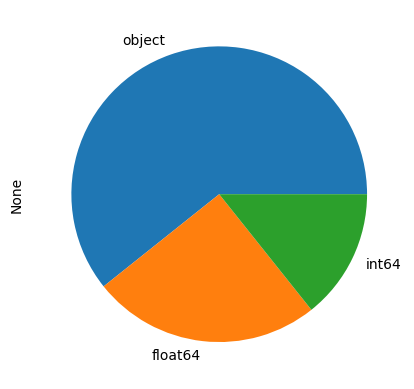

In [43]:
df_olist.dtypes.value_counts().plot.pie()

### Statistioques descriptives

In [62]:
df_olist.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
review_id,114859,95646,eef5dbca8d37dfce6db7d7b16dd0525e,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,114859,95831,895ab968e7bb0d5659d16cd74cd1650c,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_score,114859.0,NaN,NaN,NaN,4.080568,1.347585,1.0,4.0,5.0,5.0,5.0
review_comment_title,13584,4365,Recomendo,494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_comment_message,48092,34438,Muito bom,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_creation_date,114859,626,2017-12-19 00:00:00,534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_answer_timestamp,114859,95492,2017-08-17 22:17:55,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,114859.0,NaN,NaN,NaN,1.194586,0.685716,1.0,1.0,1.0,1.0,21.0
product_id,114859,32072,aca2eb7d00ea1a7b8ebd4e68314663af,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,114859,2965,4a3ca9315b744ce9f8e9374361493884,2093,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyse des valeurs manquantes

<AxesSubplot:>

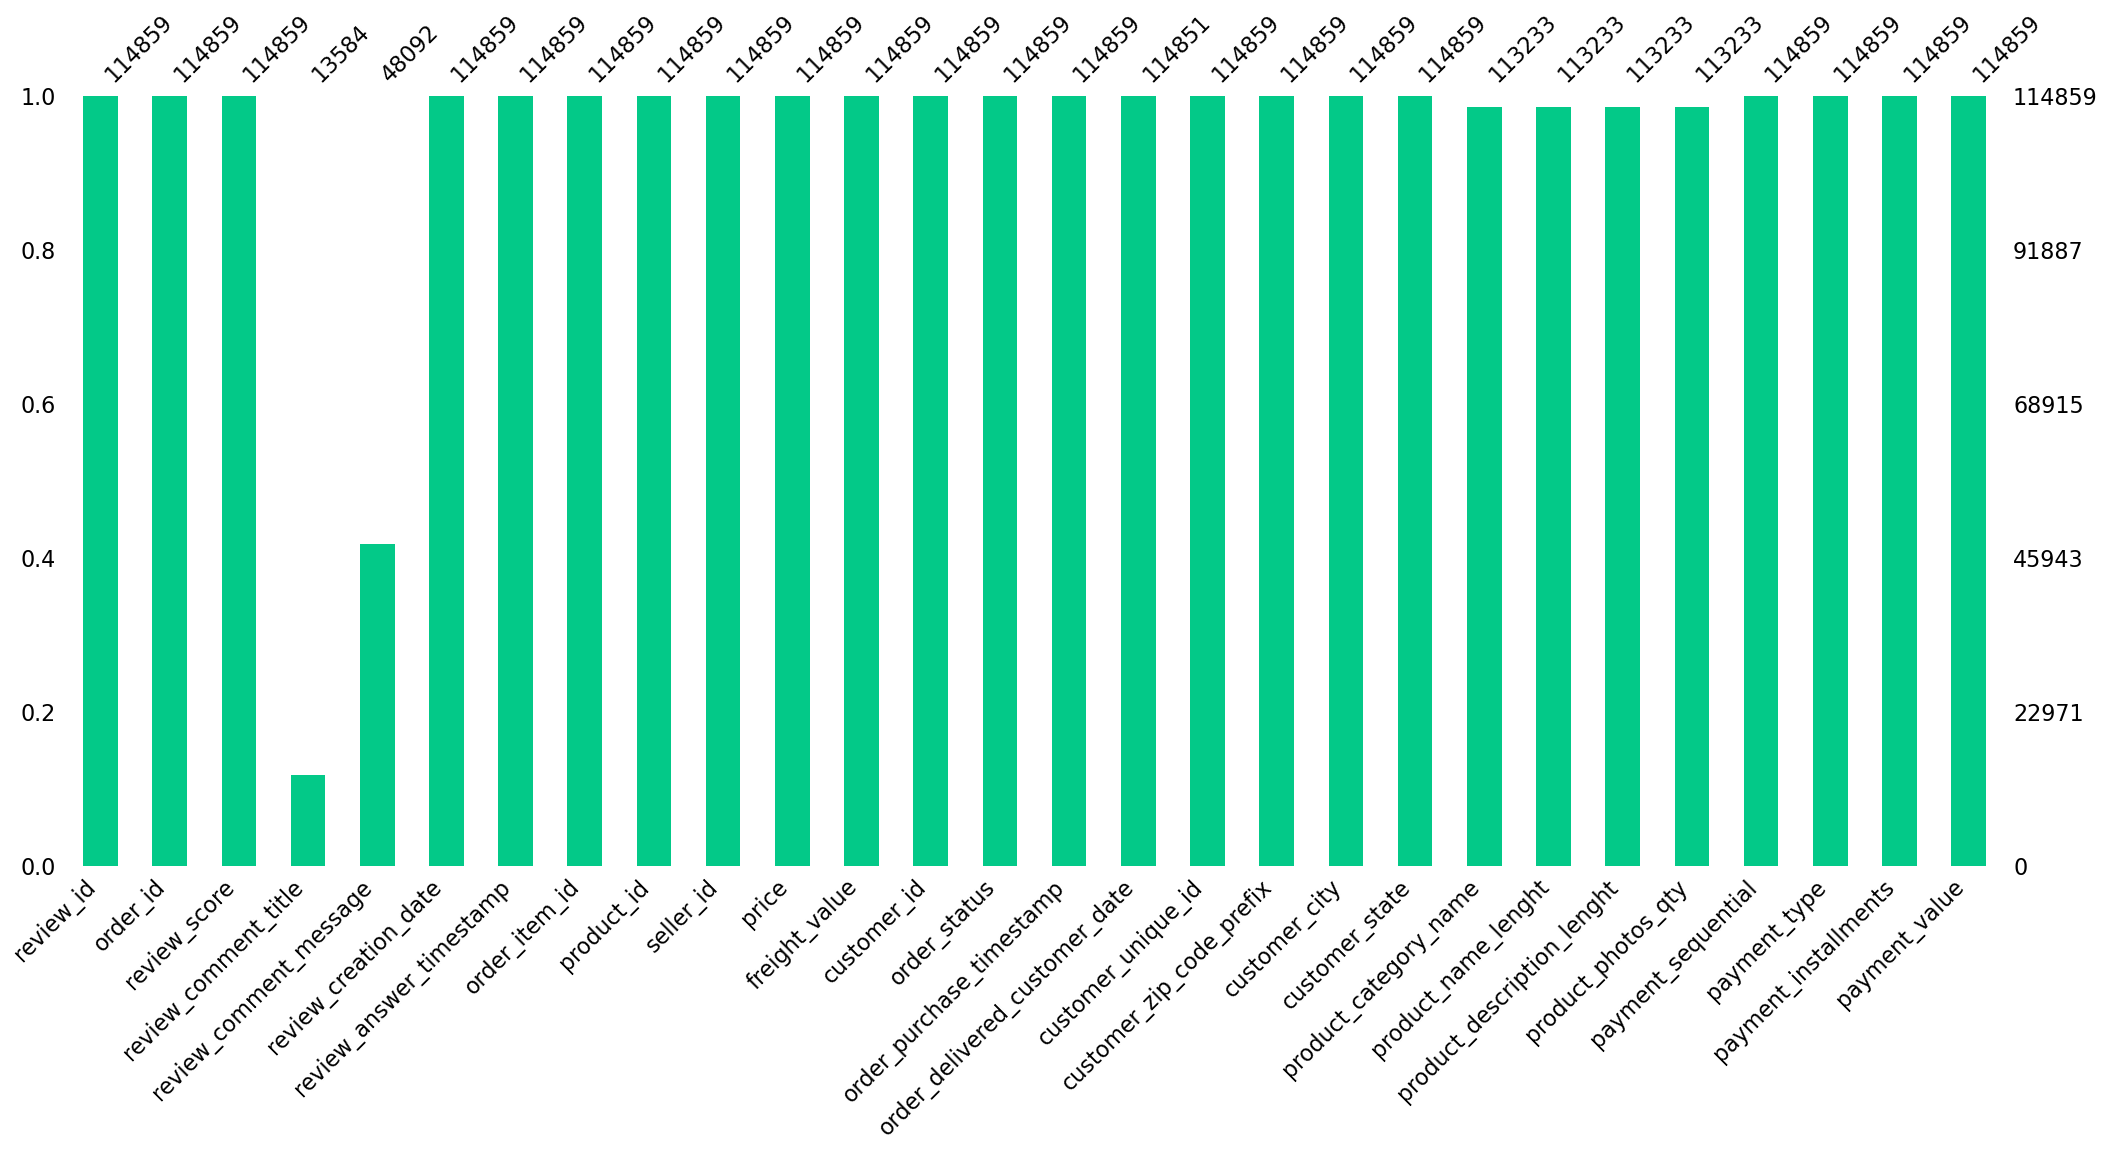

In [45]:
msno.bar(df_olist, color = '#03C988')

In [46]:
def showall_missing(df_olist):
    return (df_olist.isna().sum()/df_olist.shape[0]).sort_values(ascending=True)*100

In [47]:
showall_missing(df_olist)

review_id                         0.000000
payment_type                      0.000000
payment_sequential                0.000000
customer_state                    0.000000
customer_city                     0.000000
customer_zip_code_prefix          0.000000
customer_unique_id                0.000000
order_purchase_timestamp          0.000000
payment_installments              0.000000
customer_id                       0.000000
freight_value                     0.000000
order_status                      0.000000
seller_id                         0.000000
product_id                        0.000000
order_item_id                     0.000000
review_answer_timestamp           0.000000
review_creation_date              0.000000
review_score                      0.000000
order_id                          0.000000
price                             0.000000
payment_value                     0.000000
order_delivered_customer_date     0.006965
product_category_name             1.415649
product_nam

In [48]:
def pie_NaN(dataframe):

    lignes = dataframe.shape[0] 
    colonnes = dataframe.shape[1]

  # nombre de données non manquante
    nb_data = dataframe.count().sum()

  # nombre de données totale de ce jeu de données (colonnes*lignes)
    nb_totale = (colonnes*lignes)

  #taux remplissage jeu de données
    rate_dataOK = (nb_data/nb_totale)
    print("Le jeux de données est rempli à {:.2%}".format(rate_dataOK))
    print("et il a {:.2%} de données manquantes".format(1-rate_dataOK))
    print(" ")
    print(" ")
    
     # Pie Plot
    rates = [rate_dataOK, 1 - rate_dataOK]
    labels = ["Données", "NAN"]

    explode =(0,0.1) 
    colors = ['gold', 'pink']

  # Plot
    plt.figure(figsize=(12,15))
    plt.pie(rates, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', shadow=True, textprops={'fontsize': 26})

    ttl=plt.title("Taux des valeurs manquantes dans le jeu de données", fontsize = 32)
    ttl.set_position([0.5, 0.50])

    plt.axis('equal')
  #ax.legend(labels, loc = "upper right", fontsize = 18)
    plt.tight_layout() 

    plt.show() 

Le jeux de données est rempli à 94.57%
et il a 5.43% de données manquantes
 
 


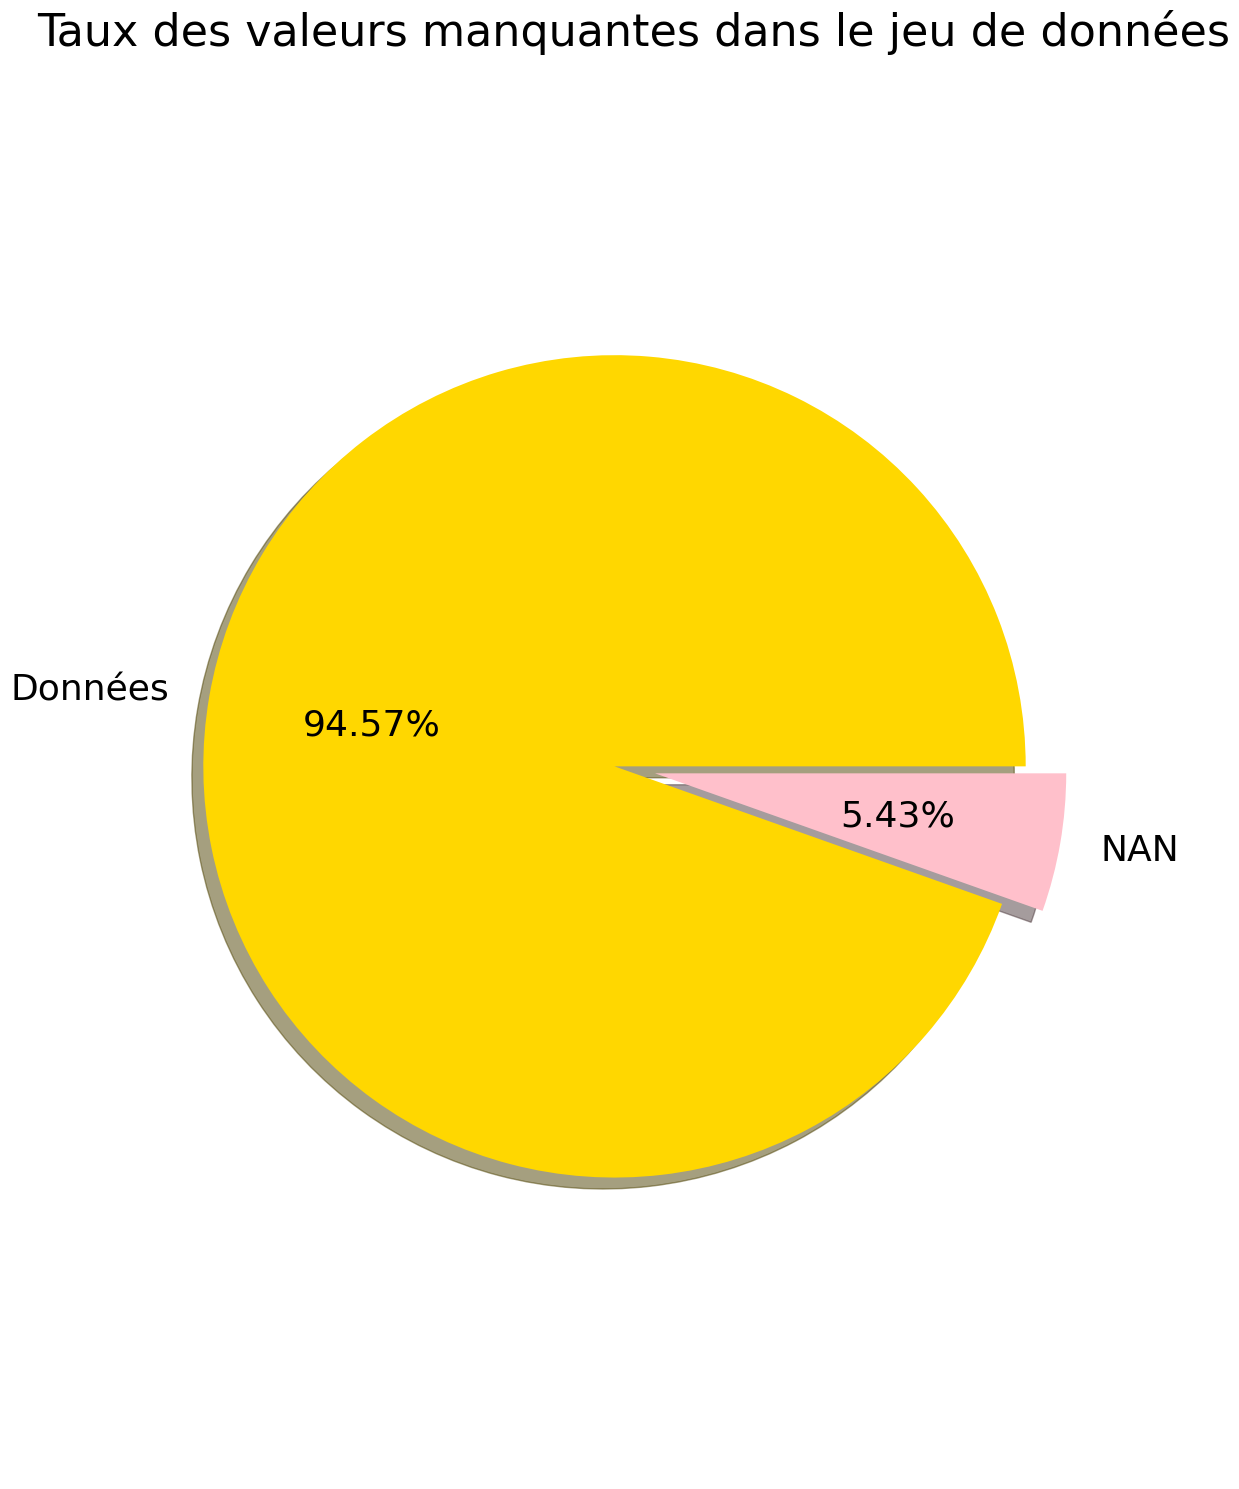

In [49]:
pie_NaN(df_olist)

### La distribution marginale des variables

<Figure size 800x500 with 0 Axes>

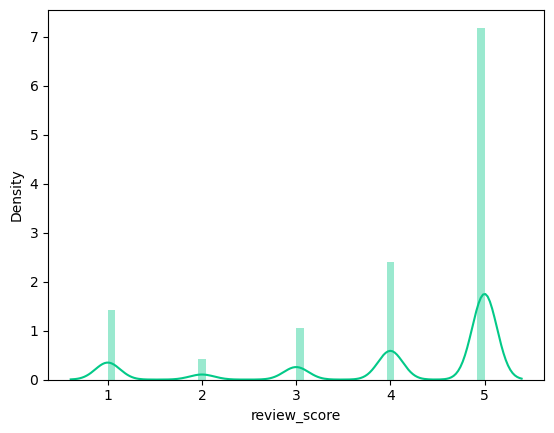

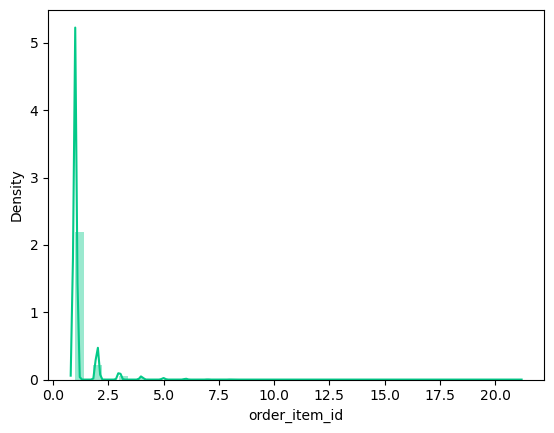

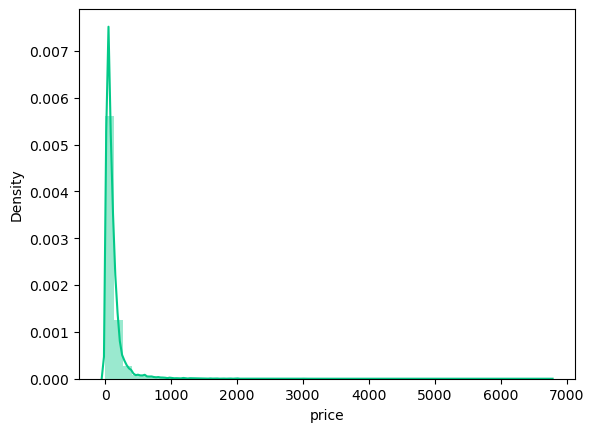

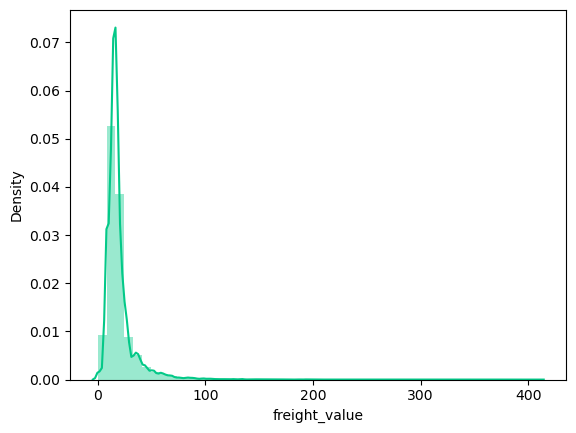

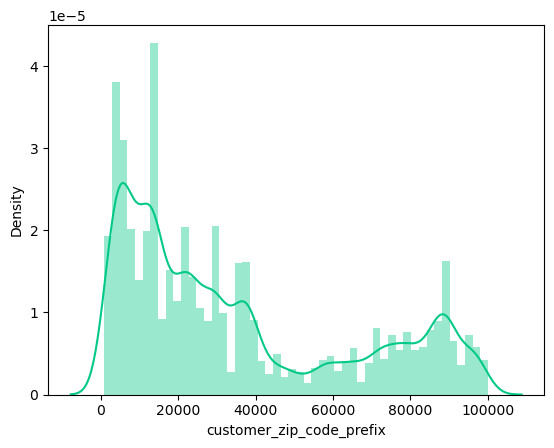

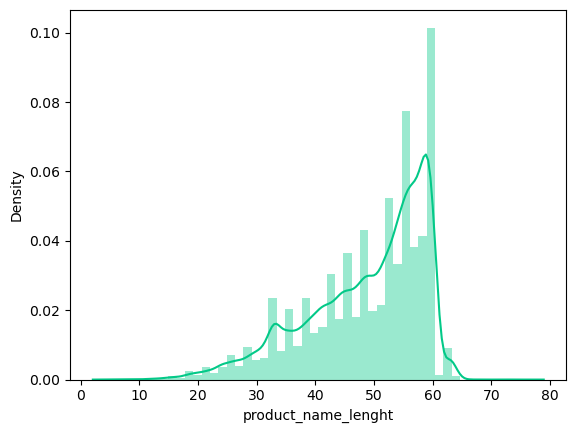

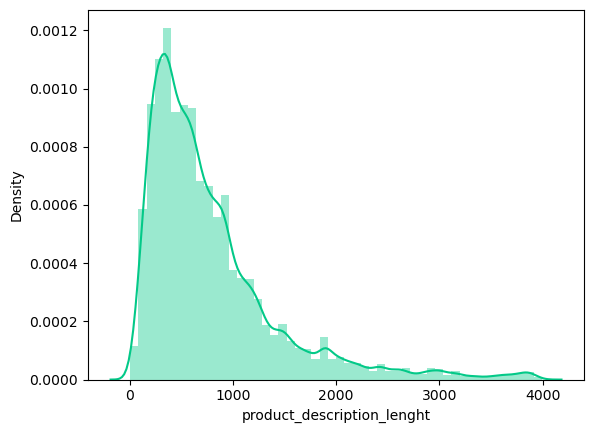

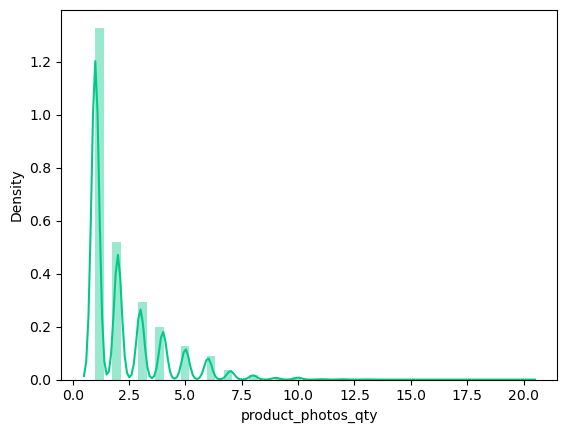

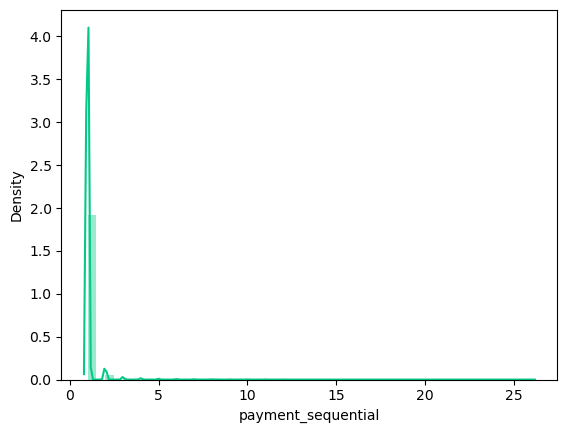

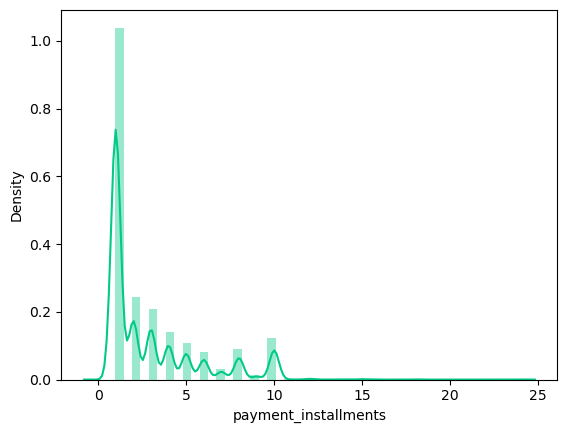

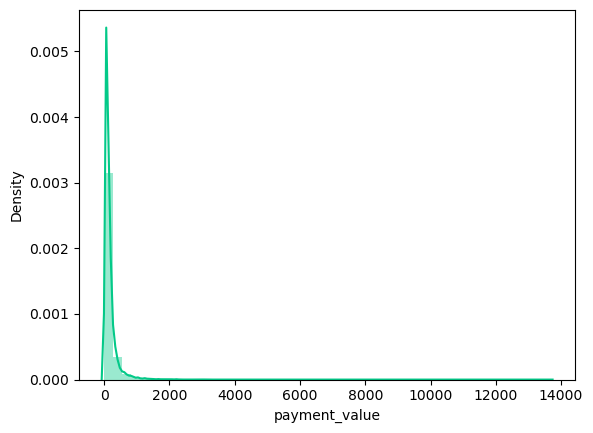

In [50]:
plt.figure(figsize=(8,5))
for cole in df_olist.select_dtypes(include="number"):
    plt.figure()
    sns.distplot(df_olist[cole], color="#03C988")

<Figure size 800x500 with 0 Axes>

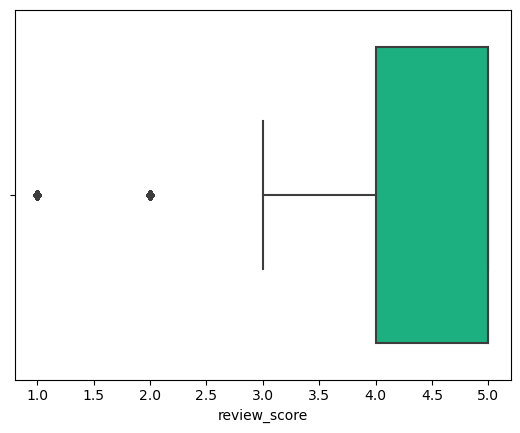

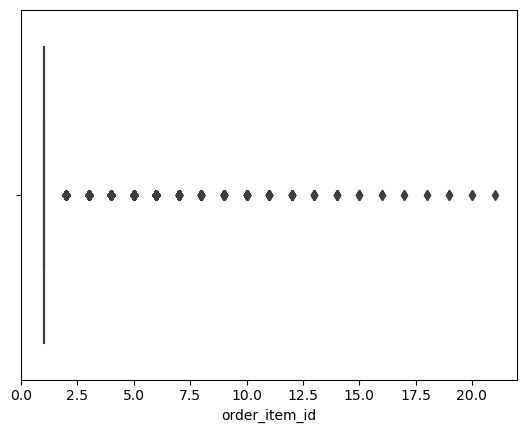

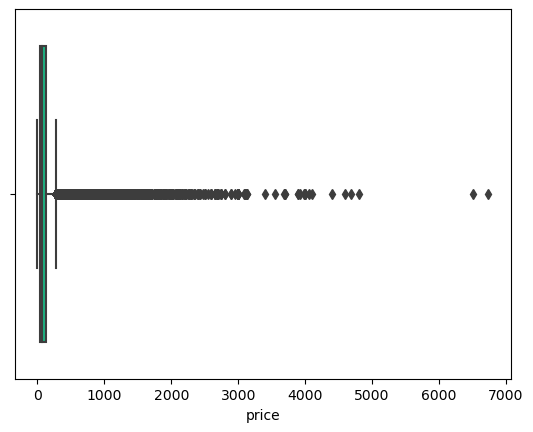

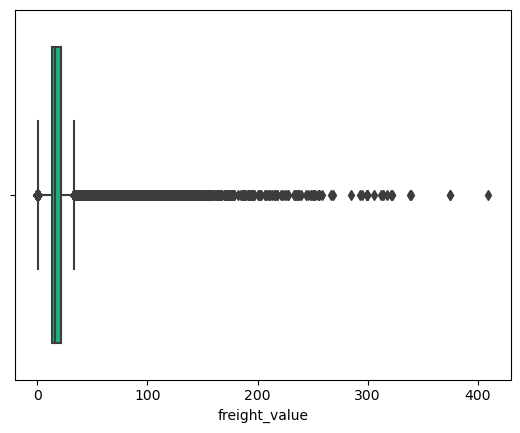

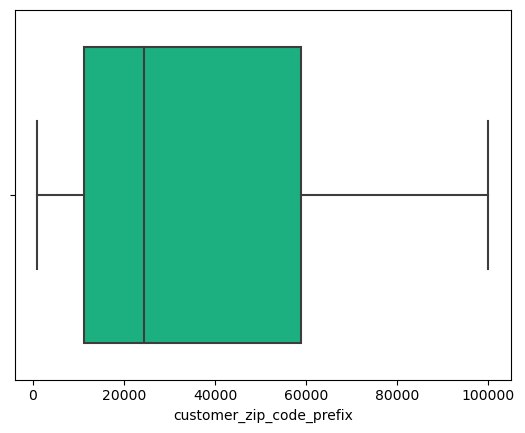

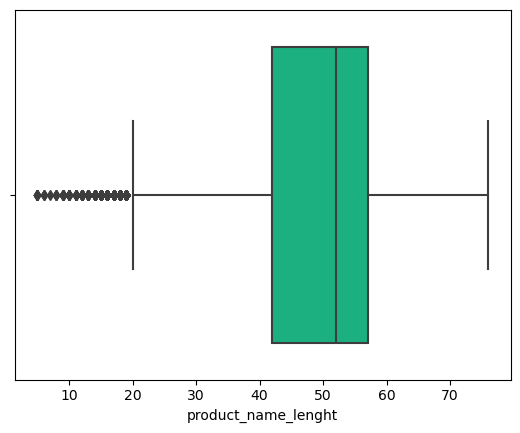

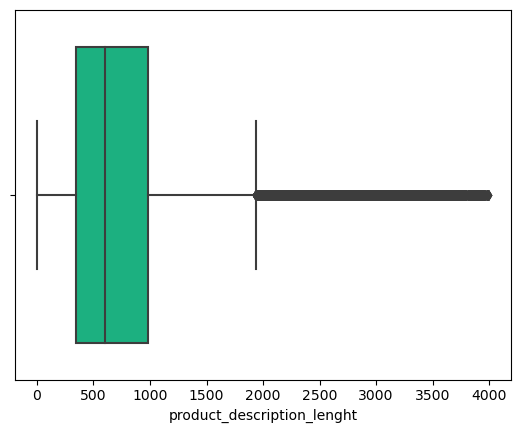

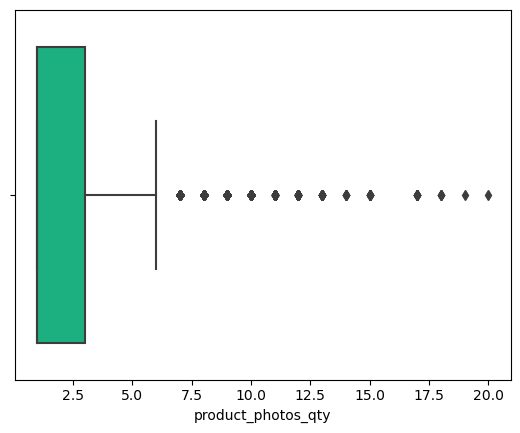

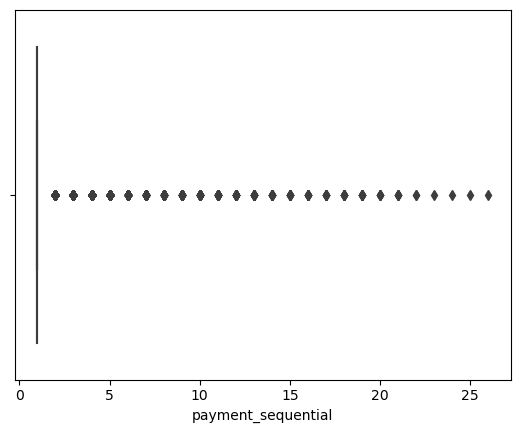

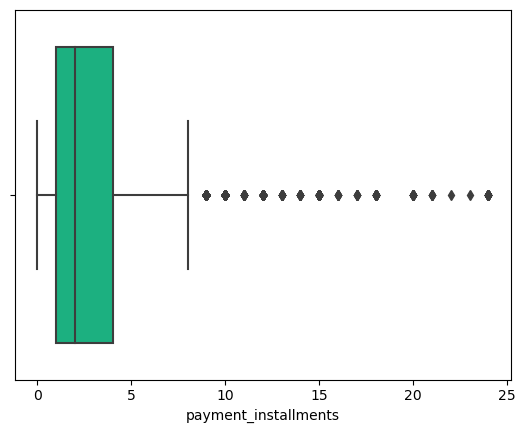

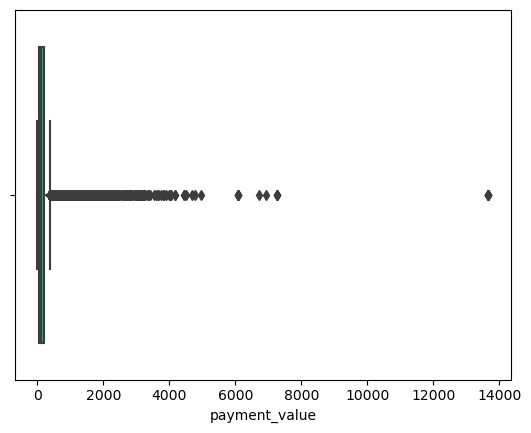

In [51]:
plt.figure(figsize=(8,5))
for cole in df_olist.select_dtypes(include="number"):
    plt.figure()
    sns.boxplot(df_olist[cole], color="#03C988")

### Repartition des clients par ville

In [52]:
# Distribution of customers by city of Brazil
distribution = df_olist[['customer_city', 'customer_unique_id']].\
                        groupby(['customer_city']).agg('count').reset_index().\
                        sort_values('customer_unique_id', ascending=False)
distribution.rename(columns={'customer_unique_id': 'nombre clients'},
                    inplace=True)
distribution.head()

,customer_city,nombre clients
3561,sao paulo,18168
3125,rio de janeiro,7914
449,belo horizonte,3195
553,brasilia,2413
1135,curitiba,1784


### Fréquences de paiement par commande

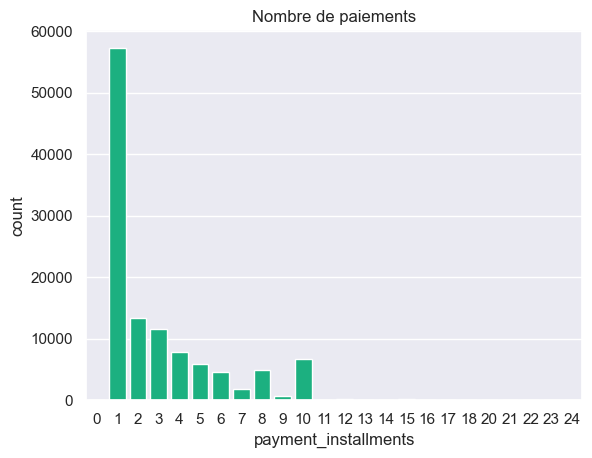

In [53]:
sns.set()
ax = sns.countplot(x='payment_installments', data=df_olist, color ="#03C988")
_ = ax.set_title('Nombre de paiements')

### Les états les plus représentés

<AxesSubplot:>

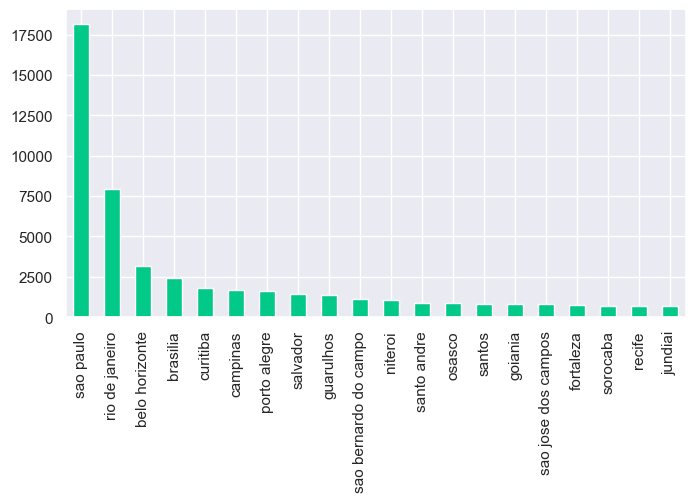

In [54]:
plt.figure(figsize=(8, 4))
df_olist.customer_city.value_counts()[:20].plot(kind='bar', color ="#03C988")

### Répartition des valeurs monétaires par catégories de produits

Text(0.5, 1.0, 'Les catégories produits les plus représentées\n')

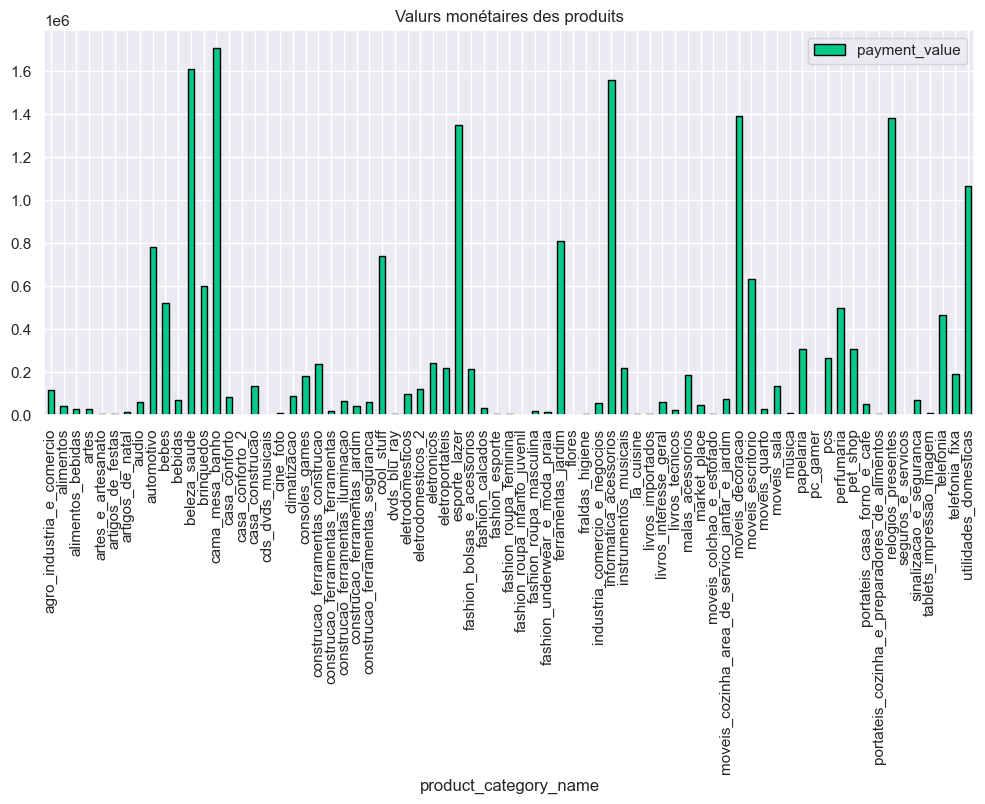

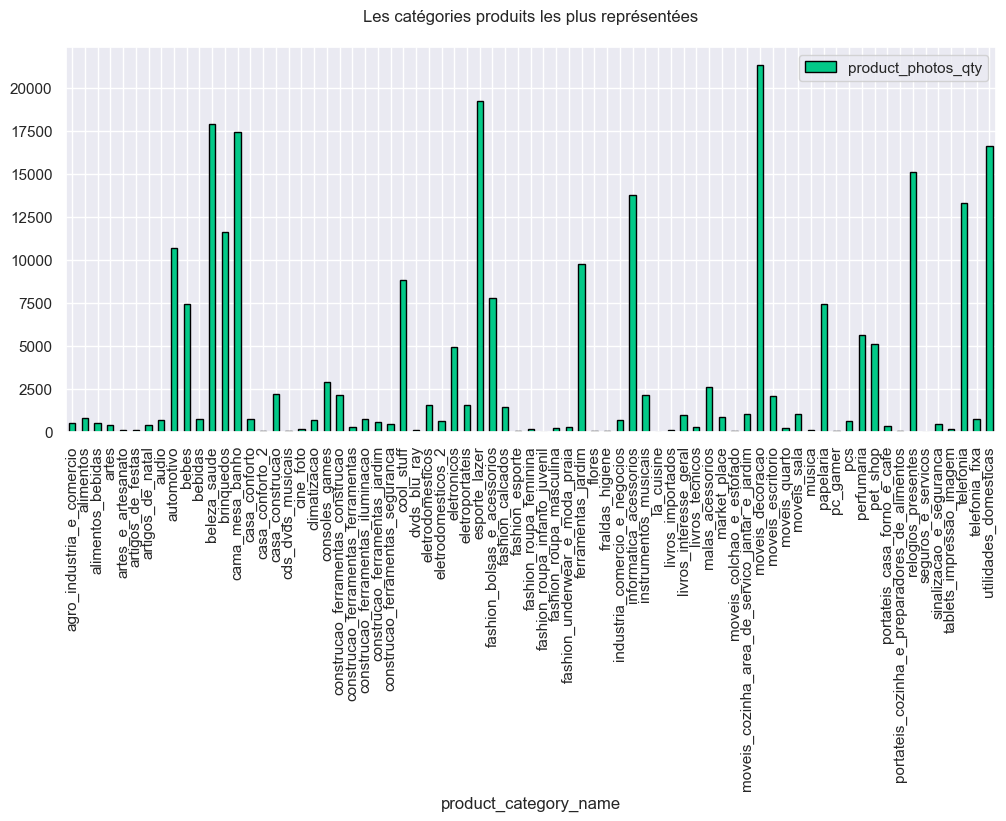

In [55]:
product_df = df_olist[["product_category_name","payment_value"]]
product_df1 = df_olist[["product_category_name","product_photos_qty"]]
product_df.groupby("product_category_name").sum().plot(kind="bar", figsize=(12, 5), color ="#03C988", edgecolor="black")
plt.title(f"Valurs monétaires des produits")
product_df1.groupby("product_category_name").sum().plot(kind="bar", figsize=(12, 5), color ="#03C988", edgecolor="black")
plt.title(f"Les catégories produits les plus représentées\n")

### Nombre de commandes par client

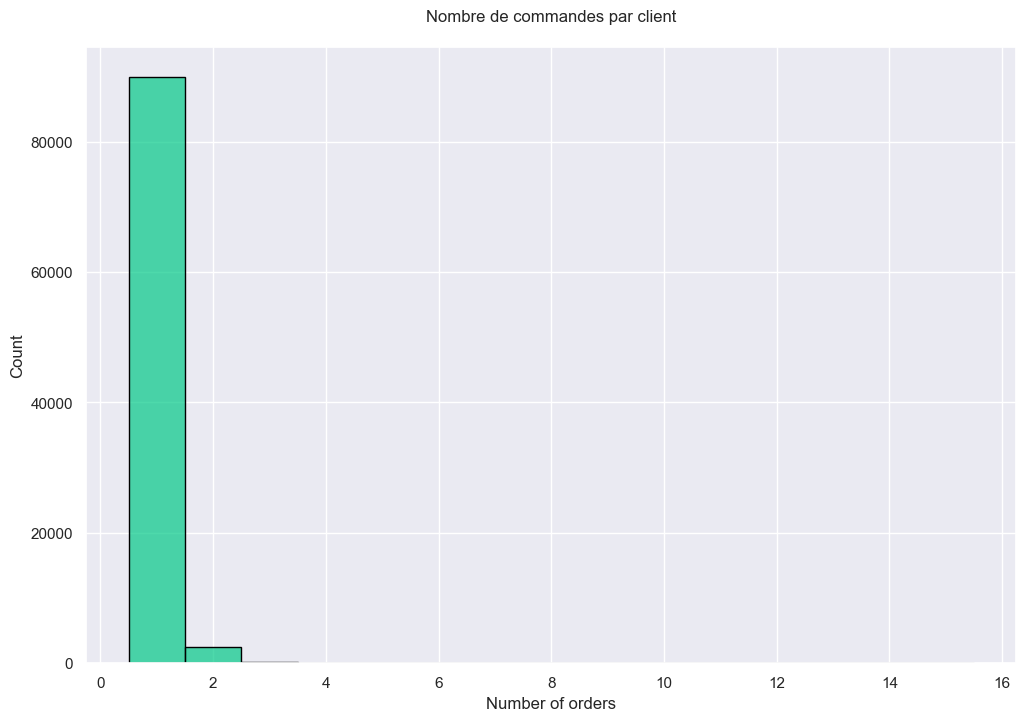

In [56]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(df_olist.groupby("customer_unique_id").agg({"order_id": "nunique"}), x="order_id", discrete=True, edgecolor="black",
color="#03C988", alpha=0.7)
plt.xlabel("Number of orders")
plt.title(f"Nombre de commandes par client\n")
plt.show()

### Notes attribuées aux produits 

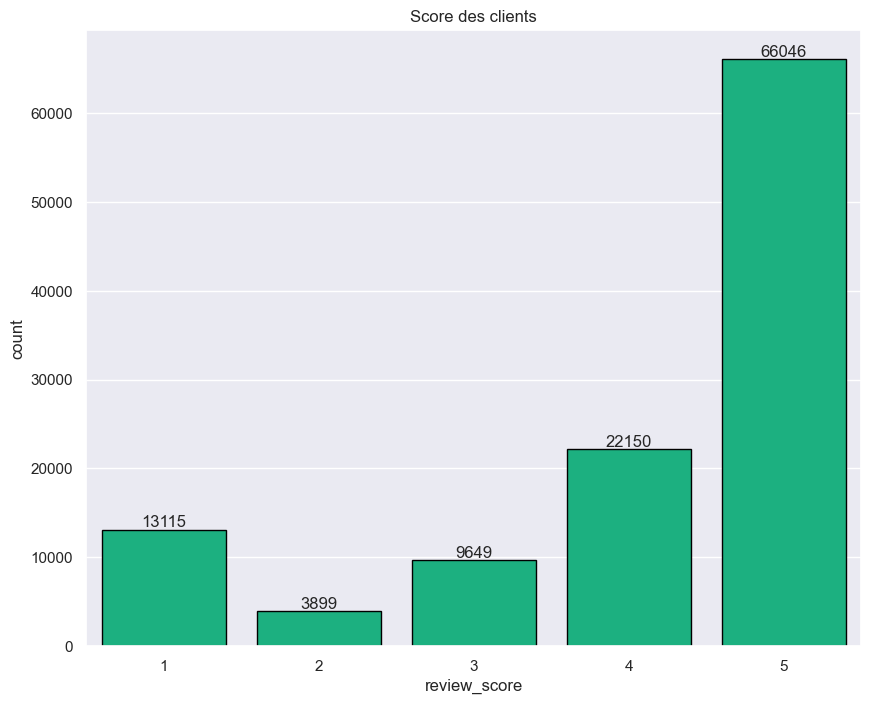

In [57]:
sns.set()
plt.rcParams["figure.figsize"] = (10, 8)
ax = sns.countplot(x='review_score', data=df_olist, color="#03C988", edgecolor="black")
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Score des clients')

### Evolution des commandes par jour

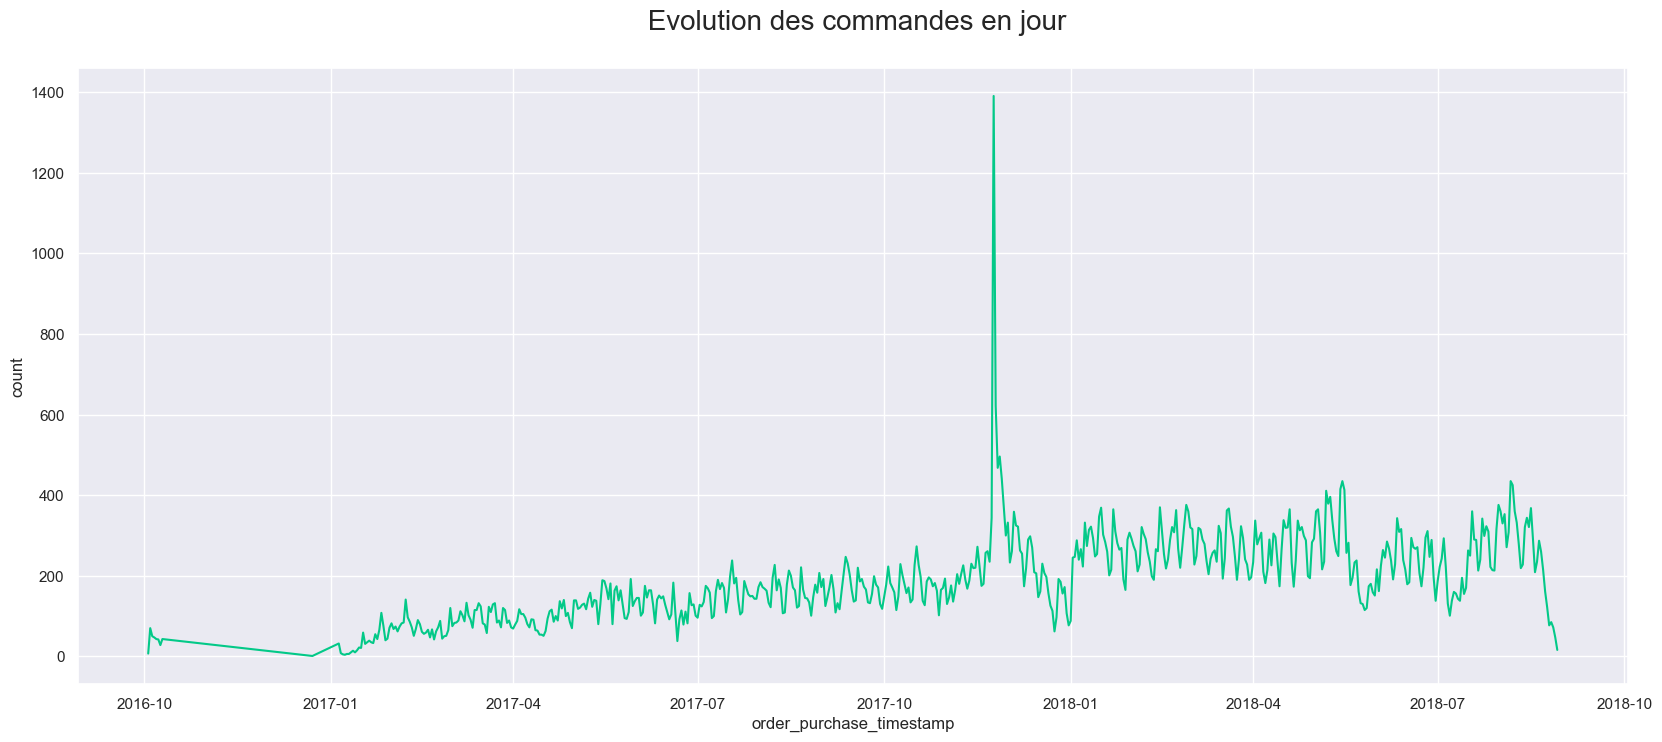

In [63]:
orders_per_days = df_olist.groupby(df_olist["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="#03C988")
ax.set_ylabel("count")
plt.title(f" Evolution des commandes en jour\n",  fontsize = 20)
plt.show()

### Les moyens de paiement les plus utilisés pour les commandes

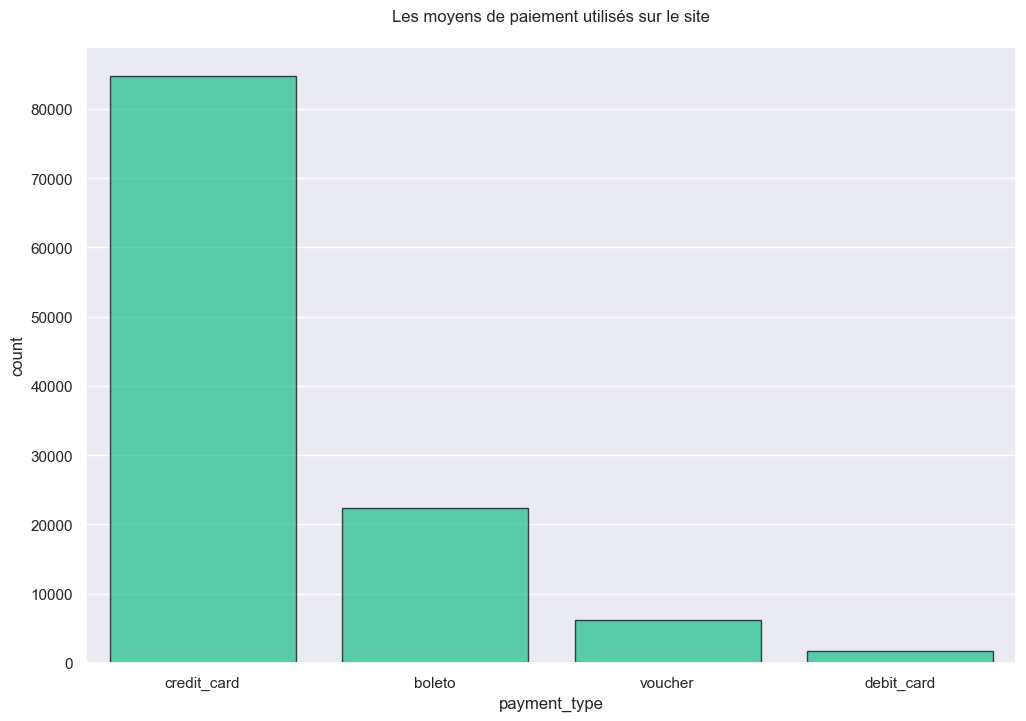

In [59]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=df_olist, x="payment_type",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.title(f"Les moyens de paiement utilisés sur le site\n")
plt.show()

## Sauvegrde de fichier propre

In [60]:
df_olist.to_csv('data_modelisation.csv')